In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 44ms/step - accuracy: 0.3511 - loss: 1.7664 - val_accuracy: 0.5560 - val_loss: 1.2683
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.5892 - loss: 1.1626 - val_accuracy: 0.6335 - val_loss: 1.0523
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.6433 - loss: 1.0223 - val_accuracy: 0.6403 - val_loss: 1.0522
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.6735 - loss: 0.9377 - val_accuracy: 0.6702 - val_loss: 0.9525
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7011 - loss: 0.8595 - val_accuracy: 0.6718 - val_loss: 0.9548
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.7185 - loss: 0.8161 - val_accuracy: 0.6959 - val_loss: 0.8963
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7341 - loss: 0.7725 - val_accuracy: 0.6907 - val_loss: 0.9131
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.7495 -

In [5]:
model.save("cnn_model.keras")


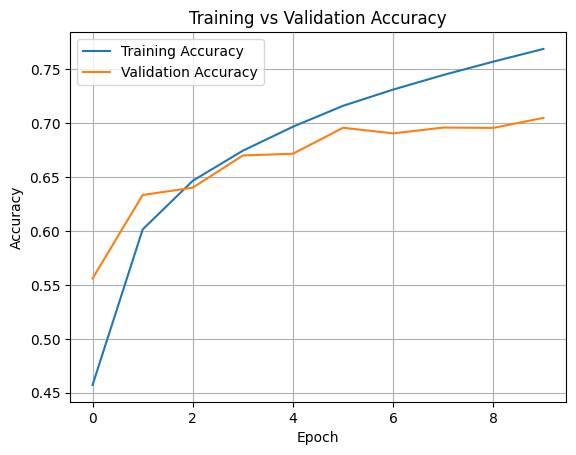

In [2]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


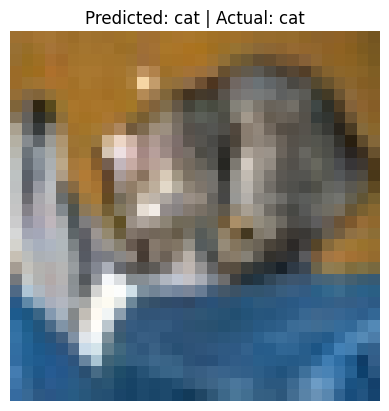

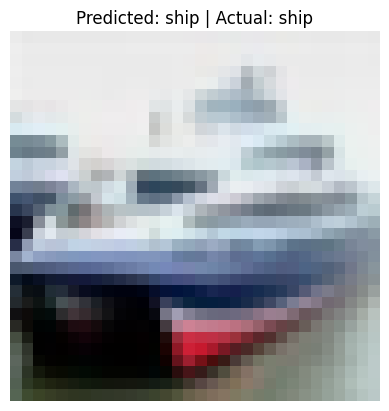

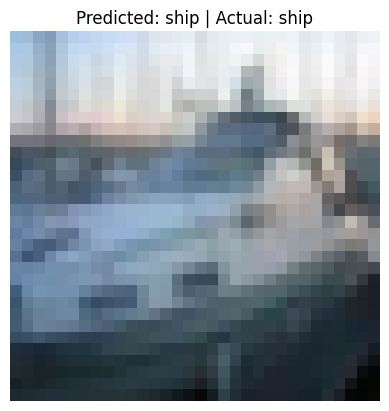

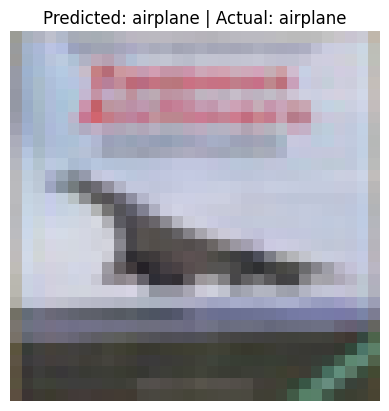

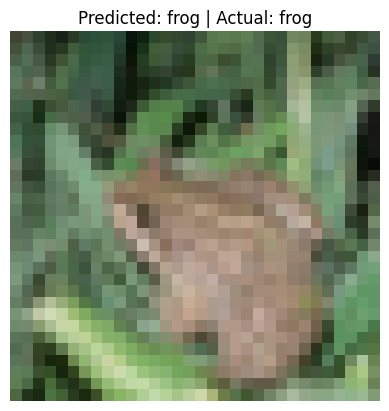

In [3]:
import numpy as np

# CIFAR-10 class names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Add a softmax layer to get probabilities
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

# Show 5 random predictions
for i in range(5):
    plt.imshow(x_test[i])
    plt.axis('off')
    predicted_label = class_names[np.argmax(predictions[i])]
    actual_label = class_names[y_test[i][0]]
    plt.title(f"Predicted: {predicted_label} | Actual: {actual_label}")
    plt.show()
